In [31]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

## Image Classification Taxonomic Level Comparison

In [32]:
data_path = 'taxon_image_classification_cache/'

In [33]:
report_path = data_path + 'image_classification_evaluation.csv'
accuracy_path = data_path + 'image_classification_accuracies.csv'

In [34]:
df_report = pd.read_csv(report_path, index_col=0)
df_accuracies = pd.read_csv(accuracy_path)

In [35]:
df_report.head()

,precision,recall,f1-score,support,taxon_level
acinonyx_jubatus_hecki,0.533333,0.800000,0.640000,10.0,Subspecies
acinonyx_jubatus_jubatus,0.989130,0.962963,0.975871,189.0,Subspecies
caracal_caracal_caracal,0.888889,0.923077,0.905660,26.0,Subspecies
caracal_caracal_nubicus,0.000000,0.000000,0.000000,1.0,Subspecies
caracal_caracal_schmitzi,0.000000,0.000000,0.000000,2.0,Subspecies


In [36]:
df_accuracies.head()

,accuracy,taxon_level,taxon_name
0,0.881481,Subspecies,acinonyx_jubatus
1,0.307692,Subspecies,caracal_caracal
2,0.850980,Species,caracal
3,0.896574,Genus,elephantidae
4,0.439649,Subspecies,elephas_maximus


## Accuracy Analysis

In [37]:
avg_accuracy_scores = df_accuracies.groupby(['taxon_level']).agg({'accuracy': 'mean'})

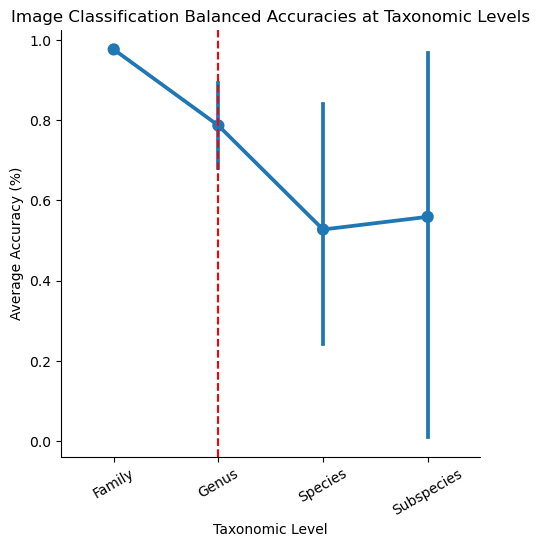

In [38]:
g = sns.catplot(data=df_accuracies, x='taxon_level', y='accuracy', kind='point', order=['Family', 'Genus', 'Species', 'Subspecies'], errorbar='pi')
g.refline(x=1, color='red')
g.set(xlabel=None)
g.set(ylabel=None)

plt.xticks(rotation=30)
plt.title('Image Classification Balanced Accuracies at Taxonomic Levels')
plt.xlabel('Taxonomic Level')
plt.ylabel('Average Accuracy (%)')
plt.show()

In [39]:
avg_accuracy_scores.head()

,accuracy
taxon_level,
Family,0.975846
Genus,0.786218
Species,0.527250
Subspecies,0.558815


## Average f1-scores

In [40]:
avg_f1_scores = df_report.groupby(['taxon_level']).agg({'f1-score': 'mean'})

In [41]:
avg_f1_scores = avg_f1_scores.reset_index()

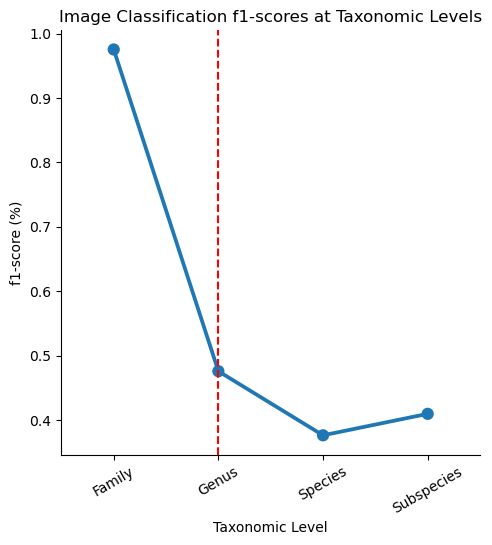

In [42]:
g = sns.catplot(data=avg_f1_scores, x='taxon_level', y='f1-score', kind='point')
g.refline(x=1, color='red')
g.set(xlabel=None)
g.set(ylabel=None)

plt.xticks(rotation=30)
plt.title('Image Classification f1-scores at Taxonomic Levels')
plt.xlabel('Taxonomic Level')
plt.ylabel('f1-score (%)')
plt.show()

### Import Original Dataset

In [43]:
file_path = '../data/processed/'
proboscidia_df = pd.read_csv(file_path + 'proboscidia_train.csv', index_col=0)
felids_df = pd.read_csv(file_path + 'felids_train.csv', index_col=0)

In [44]:
df = pd.concat([proboscidia_df, felids_df])
df = df[df['taxon_species_name'] != 'Felis catus']

In [45]:
df.head()

,observed_on,local_time_observed_at,latitude,longitude,positional_accuracy,public_positional_accuracy,image_url,license,geoprivacy,taxon_geoprivacy,scientific_name,common_name,taxon_id,taxon_kingdom_name,taxon_phylum_name,taxon_class_name,taxon_order_name,taxon_family_name,taxon_genus_name,taxon_species_name
id,,,,,,,,,,,,,,,,,,,,
16344,2007-11-30,2007-11-30 22:52:00+02:00,-17.946449,25.100015,NaN,30699.0,https://inaturalist-open-data.s3.amazonaws.com...,CC-BY,NaN,obscured,Loxodonta africana,Savannah Elephant,43694,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta africana
17097,2007-11-16,2007-11-16 20:05:00+02:00,-18.422570,24.012110,NaN,30649.0,https://inaturalist-open-data.s3.amazonaws.com...,CC-BY,NaN,obscured,Loxodonta africana,Savannah Elephant,43694,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta africana
17099,2007-11-16,2007-11-17 00:27:00+02:00,-19.196529,23.837842,NaN,30598.0,https://inaturalist-open-data.s3.amazonaws.com...,CC-BY,NaN,obscured,Loxodonta africana,Savannah Elephant,43694,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta africana
17110,2007-11-12,2007-11-12 20:23:00+02:00,-13.190468,31.680375,NaN,31045.0,https://inaturalist-open-data.s3.amazonaws.com...,CC-BY,NaN,obscured,Loxodonta africana,Savannah Elephant,43694,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta africana
17119,2007-11-12,2007-11-12 23:12:00+02:00,-13.148463,31.648811,NaN,31045.0,https://inaturalist-open-data.s3.amazonaws.com...,CC-BY,NaN,obscured,Loxodonta africana,Savannah Elephant,43694,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta africana


In [46]:
def sub_species_detection(x):
    name_count = len(x['scientific_name'].split())
    x['sub_species'] = np.nan
    if name_count >= 3:
        x['sub_species'] = x['scientific_name']
    return x

In [47]:
df = df.apply(lambda x: sub_species_detection(x), axis=1)

## Taxonomic Level

In [48]:
taxonomic_levels = df_report.groupby('taxon_level').agg({'recall': 'mean', 
                                                          'f1-score': 'mean',
                                                          'precision': 'mean'})
taxonomic_levels.head()

,recall,f1-score,precision
taxon_level,,,
Family,0.975846,0.975228,0.974621
Genus,0.703451,0.475964,0.447095
Species,0.405336,0.376516,0.392255
Subspecies,0.468818,0.409850,0.457649


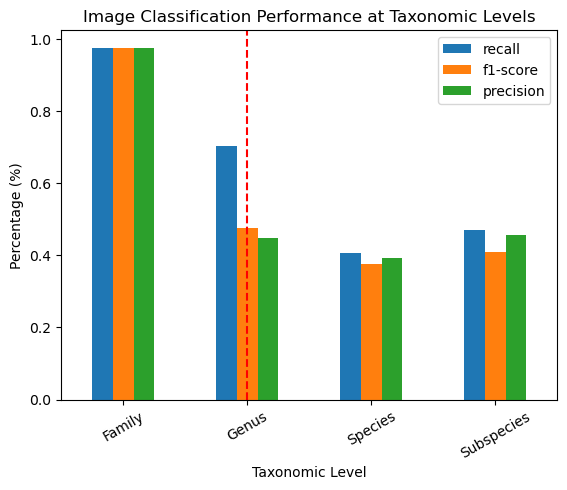

In [49]:
taxonomic_levels.plot(kind='bar')
plt.axvline(1, color='r', linestyle='--')
plt.xticks(rotation=30)

plt.title('Image Classification Performance at Taxonomic Levels')
plt.xlabel('Taxonomic Level')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

### Family Level

In [50]:
family_df = df_report[df_report['taxon_level'] == 'Family'].copy()

In [51]:
family_df.head()

,precision,recall,f1-score,support,taxon_level
elephantidae,0.965532,0.971318,0.968417,2336.0,Family
felidae,0.983710,0.980373,0.982039,4127.0,Family


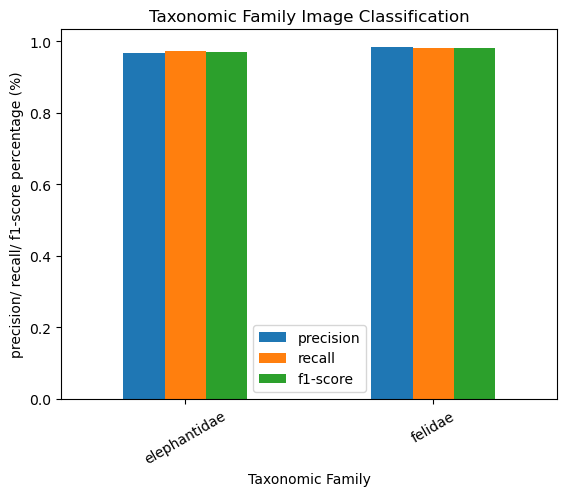

In [53]:
columns = ['precision', 'recall', 'f1-score']
family_df[columns].plot(kind='bar')
plt.xticks(rotation=30)

plt.title("Taxonomic Family Image Classification")
plt.xlabel('Taxonomic Family')
plt.ylabel('precision/ recall/ f1-score percentage (%)')
plt.legend()
plt.show()

In [54]:
family_df = df_report[df_report['taxon_level'] == 'Family'].copy()
family_df = family_df.rename_axis('taxonomic_name').reset_index()

In [55]:
df_orig_family = df.copy()
df_orig_family = df_orig_family.dropna(subset=['taxon_family_name'])

In [56]:
family_df['taxonomic_name'] = family_df['taxonomic_name'].str.capitalize()

In [57]:
order = family_df['taxonomic_name'].unique().tolist()

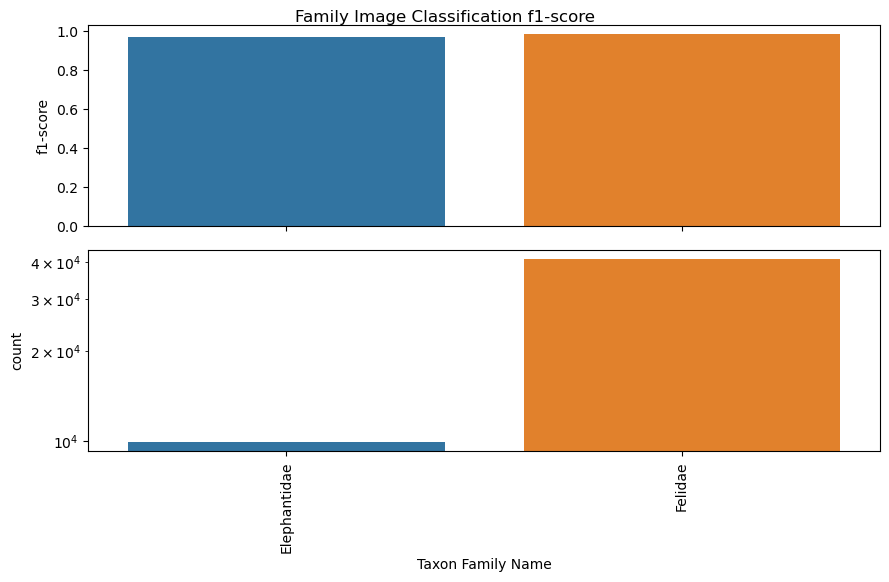

In [182]:
f, axs = plt.subplots(2,1,
                      figsize=(9,5),
                      sharex=True)

h = sns.barplot(data=family_df, x='taxonomic_name', y='f1-score', ax=axs[0], order=order)
h.set(xlabel=None)

g = sns.countplot(x='taxon_family_name', data=df_orig_family, ax=axs[1], order=order)
g.set_yscale('log')

f.tight_layout()

plt.xticks(rotation=90)
f.suptitle('Family Image Classification f1-score', y=1)
plt.xlabel('Taxon Family Name')
plt.show()

### Genus Level

In [58]:
genus_df = df_report[df_report['taxon_level'] == 'Genus'].copy()

In [59]:
genus_df = genus_df.rename_axis('taxonomic_name').reset_index()

In [60]:
genus_df.head()

,taxonomic_name,precision,recall,f1-score,support,taxon_level
0,elephas,0.665753,0.852632,0.747692,285.0,Genus
1,loxodonta,0.978691,0.940517,0.959224,2051.0,Genus
2,acinonyx,0.936275,0.892523,0.913876,214.0,Genus
3,caracal,0.279720,0.714286,0.402010,56.0,Genus
4,catopuma,0.000000,0.000000,0.000000,2.0,Genus


Generate Genus data from original dataframe.

In [61]:
df_orig_genus = df.copy()
df_orig_genus = df_orig_genus.dropna(subset=['taxon_genus_name'])

Generate the order to visualize the results in

In [62]:
genus_df['taxonomic_name'] = genus_df['taxonomic_name'].str.capitalize()

In [63]:
order = genus_df['taxonomic_name'].unique().tolist()

Visualize results and data count

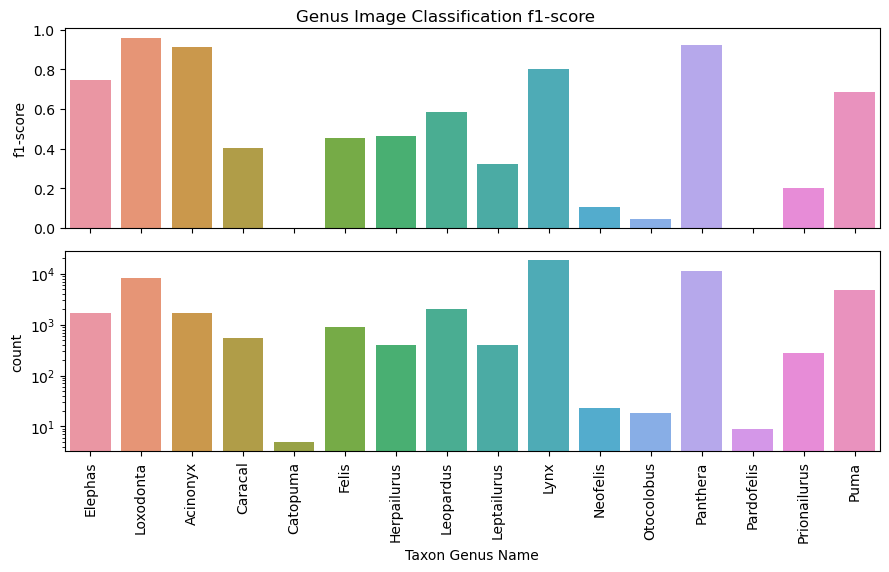

In [190]:
f, axs = plt.subplots(2,1,
                      figsize=(9,5),
                      sharex=True)

h = sns.barplot(data=genus_df, x='taxonomic_name', y='f1-score', ax=axs[0], order=order)
h.set(xlabel=None)

g = sns.countplot(x='taxon_genus_name', data=df_orig_genus, ax=axs[1], order=order)
g.set_yscale('log')

f.tight_layout()

plt.xticks(rotation=90)
f.suptitle('Genus Image Classification f1-score', y=1)
plt.xlabel('Taxon Genus Name')
plt.show()

### Species Level

In [191]:
species_df = df_report[df_report['taxon_level'] == 'Species'].copy()

In [192]:
species_df = species_df.rename_axis('taxonomic_name').reset_index()

In [193]:
df_orig_species = df.copy()
df_orig_species = df_orig_species.dropna(subset=['taxon_species_name'])

In [194]:
df_orig_species['taxon_species_name'].head()

id
16344    Loxodonta africana
17097    Loxodonta africana
17099    Loxodonta africana
17110    Loxodonta africana
17119    Loxodonta africana
Name: taxon_species_name, dtype: object

In [195]:
species_df['taxonomic_name'] = species_df['taxonomic_name'].str.capitalize()
species_df['taxonomic_name'] = species_df['taxonomic_name'].str.replace("_", " ")

In [196]:
species_df.head()

,taxonomic_name,precision,recall,f1-score,support,taxon_level
0,Caracal aurata,0.444444,0.800000,0.571429,5.0,Species
1,Caracal caracal,0.978723,0.901961,0.938776,51.0,Species
2,Felis chaus,0.666667,0.583333,0.622222,24.0,Species
3,Felis lybica,0.555556,0.394737,0.461538,38.0,Species
4,Felis margarita,0.000000,0.000000,0.000000,27.0,Species


In [197]:
order = species_df['taxonomic_name'].unique().tolist()

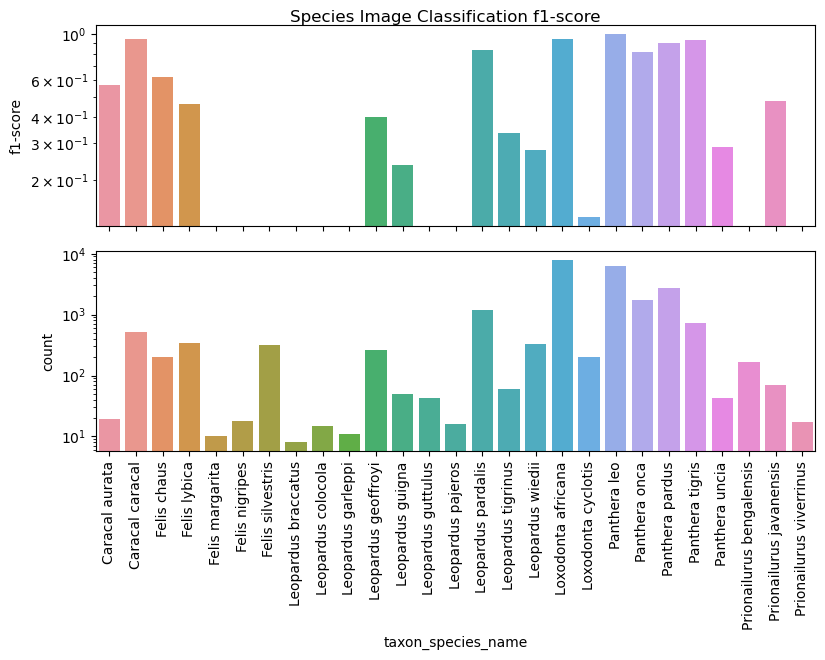

In [198]:
f, axs = plt.subplots(2,1,
                      figsize=(9,5),
                      sharex=True)

h = sns.barplot(data=species_df, x='taxonomic_name', y='f1-score', ax=axs[0], order=order)
h.set_yscale('log')
h.set(xlabel=None)

g = sns.countplot(x='taxon_species_name', data=df_orig_species, ax=axs[1], order=order)
g.set_yscale('log')

f.tight_layout()

plt.xticks(rotation=90)
f.suptitle('Species Image Classification f1-score', y=1)
plt.show()

### Sub-species Level

In [199]:
sub_species_df = df_report[df_report['taxon_level'] == 'Subspecies'].copy()

In [200]:
sub_species_df = sub_species_df.rename_axis('taxonomic_name').reset_index()

In [201]:
df_orig_subspecies = df.copy()
df_orig_subspecies = df_orig_subspecies.dropna(subset=['taxon_species_name'])

In [202]:
sub_species_df['taxonomic_name'] = sub_species_df['taxonomic_name'].str.capitalize()
sub_species_df['taxonomic_name'] = sub_species_df['taxonomic_name'].str.replace("_", " ")

In [203]:
order = sub_species_df['taxonomic_name'].unique().tolist()

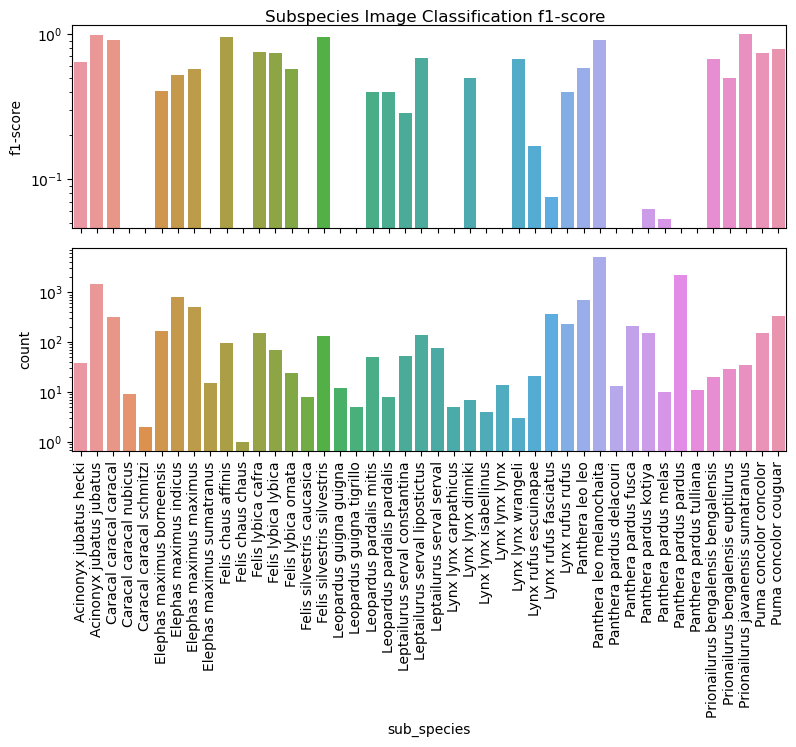

In [205]:
f, axs = plt.subplots(2,1,
                      figsize=(9,5),
                      sharex=True)

h = sns.barplot(data=sub_species_df, x='taxonomic_name', y='f1-score', ax=axs[0], order=order)
h.set_yscale('log')
h.set(xlabel=None)

g = sns.countplot(x='sub_species', data=df_orig_subspecies, ax=axs[1], order=order)
g.set_yscale('log')

f.tight_layout()

plt.xticks(rotation=90)
f.suptitle('Subspecies Image Classification f1-score', y=1)
plt.show()